In [1]:
import numpy as np
import pandas as pd
import scipy
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
tickers = ["^GSPC", "^FTSE", "^N225", "^GDAXI"]
raw_data = yf.download(
    tickers=tickers,
    start="1994-01-07",
    end="2024-12-31",  # Use 'end' instead of 'end_date'
    interval="1d",
    group_by="ticker",
    auto_adjust=True,  # Automatically adjust for splits and dividends
    threads=True  # Use threading for faster downloads
)

[*********************100%***********************]  4 of 4 completed


In [3]:
df_comp = raw_data.copy()

In [4]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [5]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp = df_comp.asfreq('B')
df_comp = df_comp.fillna(method='ffill')

In [6]:
df_comp['ret_spx'] = df_comp['spx'].pct_change(1) * 100
df_comp['ret_ftse'] = df_comp['ftse'].pct_change(1) * 100
df_comp['ret_dax'] = df_comp['dax'].pct_change(1) * 100
df_comp['ret_nikkei'] = df_comp['nikkei'].pct_change(1) * 100

In [7]:
df_comp['ret_spx'] = df_comp['spx'].pct_change(1) * 100
df_comp['ret_ftse'] = df_comp['ftse'].pct_change(1) * 100
df_comp['ret_dax'] = df_comp['dax'].pct_change(1) * 100
df_comp['ret_nikkei'] = df_comp['nikkei'].pct_change(1) * 100

In [8]:
size = int(len(df_comp) * 0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
model_ar = ARIMA(df_comp['ftse'], order=(1, 0, 0))  # Ajustez l'ordre selon vos besoins
results_ar = model_ar.fit()

In [11]:
df_comp.tail()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
Price,,,,,,,,
Date,,,,,,,,
2024-12-09,6052.850098,20345.960938,8352.099609,39160.500000,-0.614421,0.523554,-0.189596,0.177350
2024-12-10,6034.910156,20329.160156,8280.400391,39367.578125,-0.296388,-0.858457,-0.082576,0.528793
2024-12-11,6084.189941,20399.160156,8301.599609,39372.230469,0.816579,0.256017,0.344333,0.011818
2024-12-12,6051.250000,20426.269531,8311.799805,39849.140625,-0.541402,0.122870,0.132895,1.211286
2024-12-13,6051.089844,20405.919922,8300.299805,39470.441406,-0.002647,-0.138358,-0.099625,-0.950332


In [107]:
start_date = "2024-12-09"
end_date = "2024-12-13"

In [108]:
df_pred = results_ar.predict(start=start_date, end=end_date)

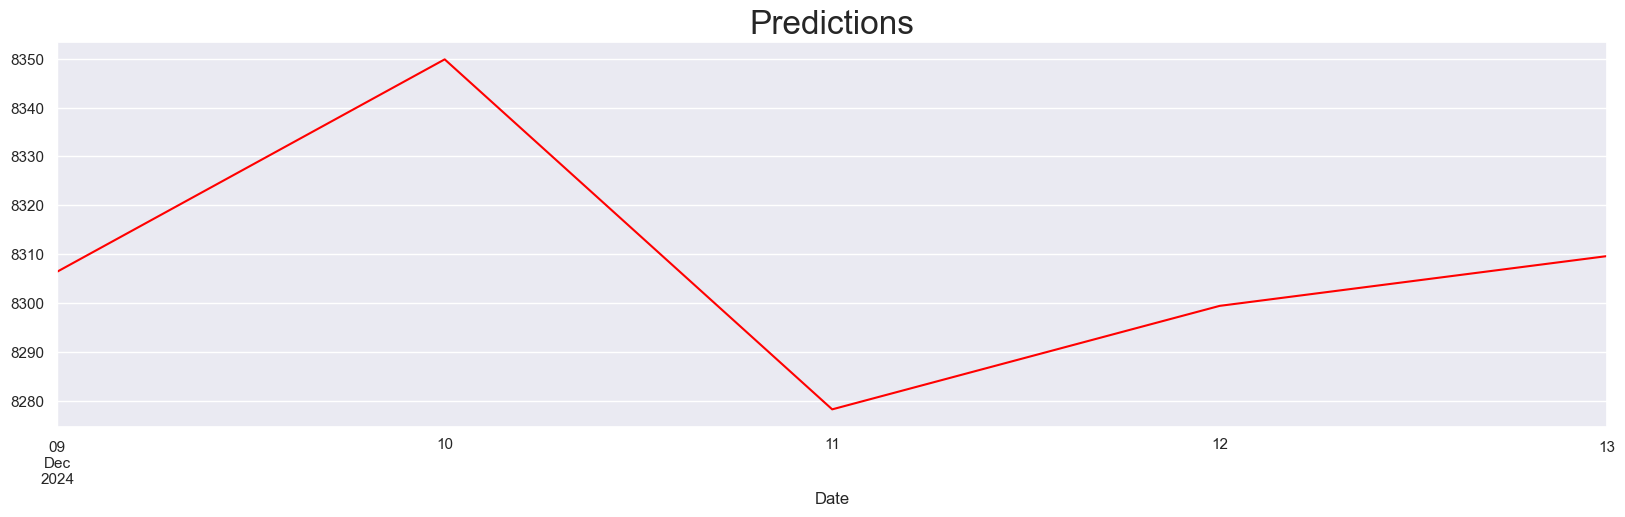

In [109]:
df_pred[start_date:end_date].plot(figsize=(20, 5), color="red")
plt.title("Predictions", size=24)
plt.show()

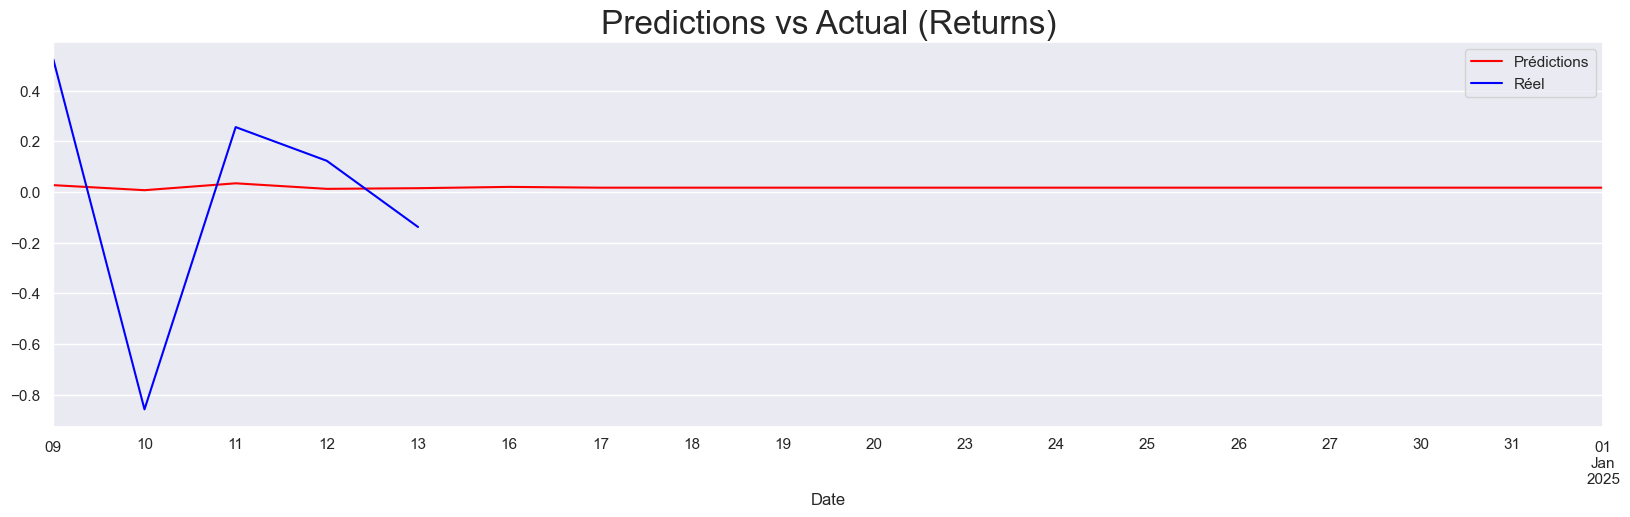

In [130]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Plage de dates
start_date = '2024-12-09'
end_date = '2025-01-01'
# Créer et ajuster le modèle ARIMA pour les rendements 'ret_ftse' de df_comp
model_ret_ar = ARIMA(df_comp['ret_ftse'][1:], order=(1, 0, 0))
results_ret_ar = model_ret_ar.fit()

# Effectuer la prédiction sur la plage de dates spécifiée
df_pred_ar = results_ret_ar.predict(start=start_date, end=end_date)

# Tracer les prédictions (en rouge)
df_pred_ar.plot(figsize=(20, 5), color="red", label="Prédictions")

# Tracer les valeurs réelles de 'ret_ftse' dans df_test (en bleu)
df_test['ret_ftse'][start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre
plt.title("Predictions vs Actual (Returns)", size=24)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


In [131]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 8069
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -12162.918
Date:                Sun, 15 Dec 2024   AIC                          24331.835
Time:                        14:19:47   BIC                          24352.823
Sample:                    01-11-1994   HQIC                         24339.016
                         - 12-13-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.012      1.394      0.163      -0.007       0.041
ar.L1         -0.0197      0.006     -3.077      0.002      -0.032      -0.007
sigma2         1.1934      0.009    140.012      0.000       1.177       1.210
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20680.61
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

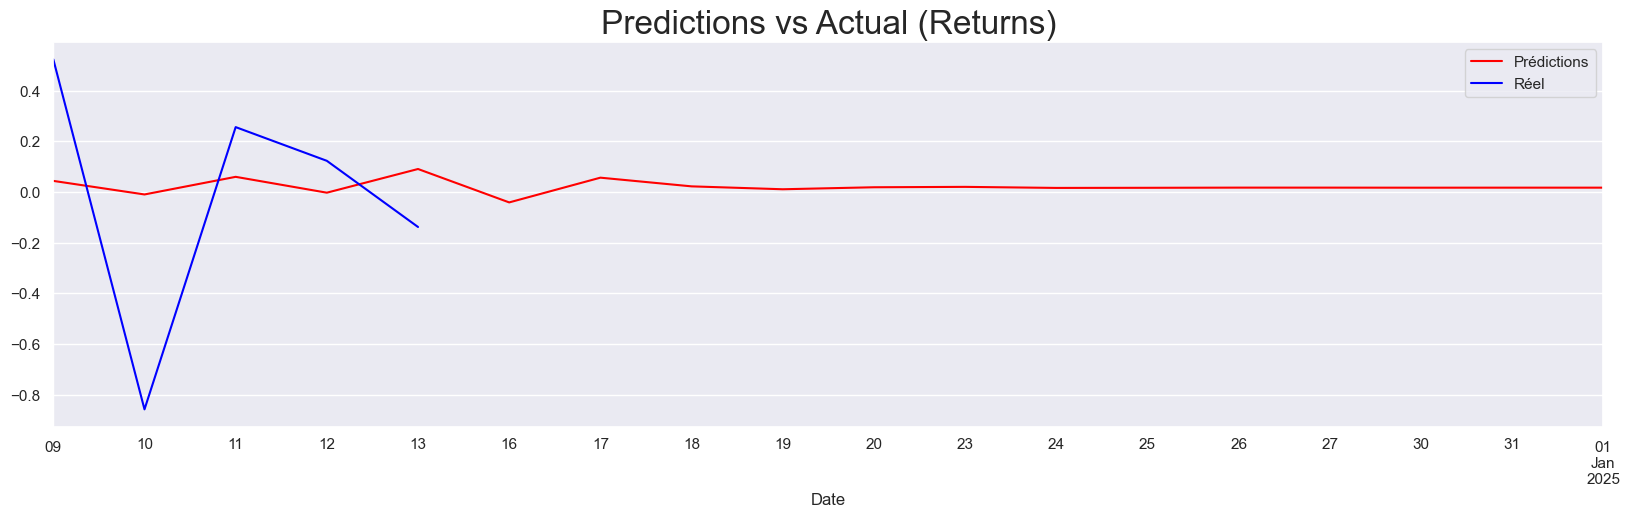

In [133]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


end_date = '2025-01-01'
# Créer et ajuster le modèle ARIMA pour les rendements 'ret_ftse' de df_comp
model_ret_ar = ARIMA(df_comp['ret_ftse'][1:], order=(5, 0, 0))
results_ret_ar = model_ret_ar.fit()

# Effectuer la prédiction sur la plage de dates spécifiée
df_pred_ar = results_ret_ar.predict(start=start_date, end=end_date)

# Tracer les prédictions (en rouge)
df_pred_ar.plot(figsize=(20, 5), color="red", label="Prédictions")

# Tracer les valeurs réelles de 'ret_ftse' dans df_test (en bleu)
df_test['ret_ftse'][start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre
plt.title("Predictions vs Actual (Returns)", size=24)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


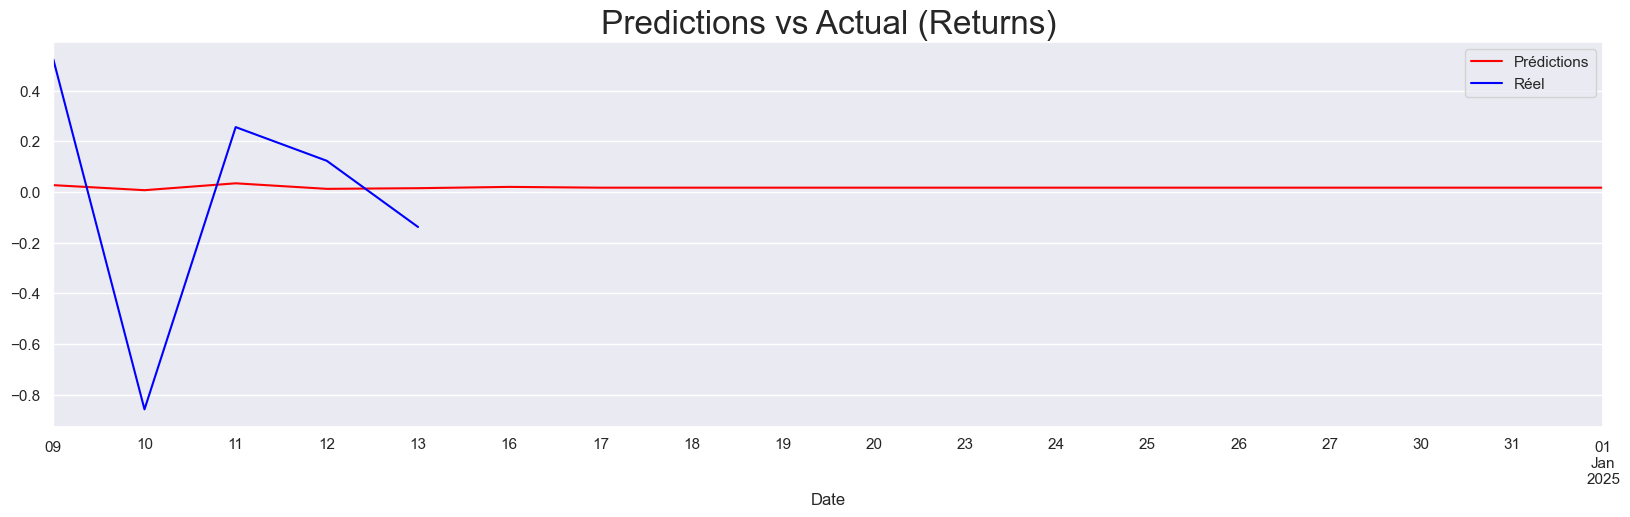

In [134]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


end_date = '2025-01-01'

# Créer et ajuster le modèle ARIMA pour les rendements 'ret_ftse' de df_comp
model_ret_ar = ARIMA(df_comp['ret_ftse'][1:], order=(1, 0, 0))
results_ret_ar = model_ret_ar.fit()

# Effectuer la prédiction sur la plage de dates spécifiée
df_pred_ar = results_ret_ar.predict(start=start_date, end=end_date)

# Tracer les prédictions (en rouge)
df_pred_ar.plot(figsize=(20, 5), color="red", label="Prédictions")

# Tracer les valeurs réelles de 'ret_ftse' dans df_test (en bleu)
df_test['ret_ftse'][start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre
plt.title("Predictions vs Actual (Returns)", size=24)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


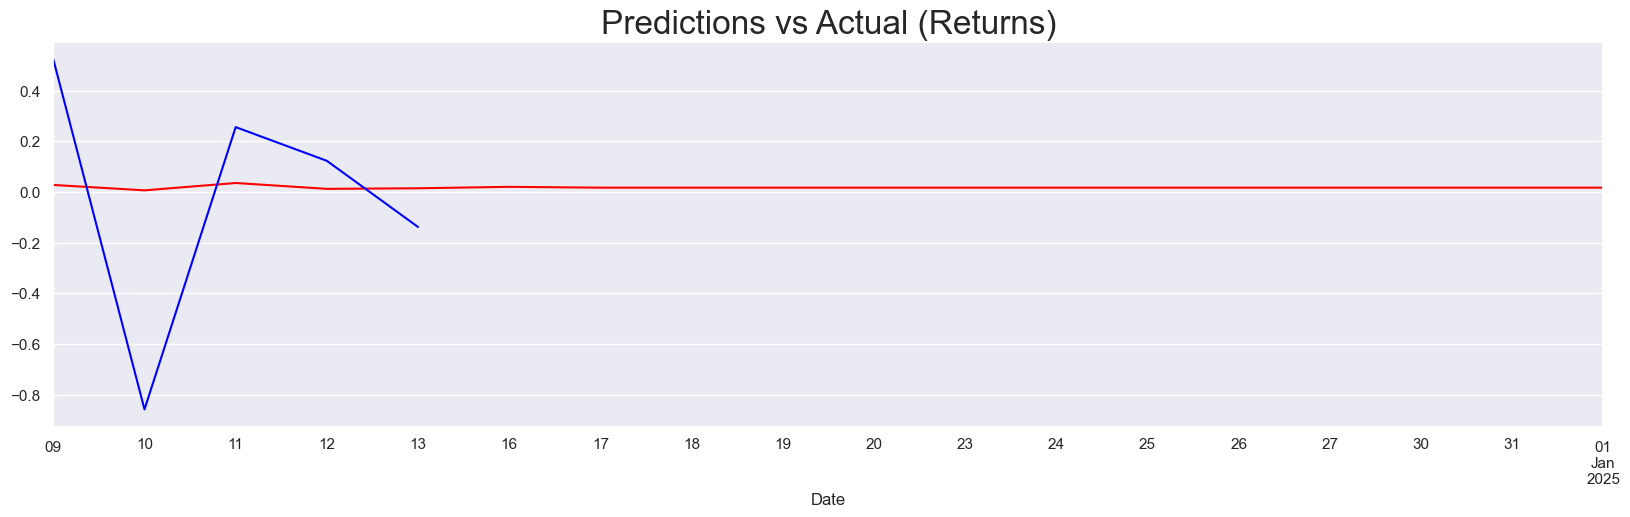

In [137]:
end_date = '2025-01-01'
model_ret_ma = ARIMA(df_comp.ret_ftse[1:], order=(0, 0, 1))
results_ret_ma = model_ret_ma.fit()
df_pred_ma = results_ret_ma.predict(start=start_date, end=end_date)
df_pred_ma[start_date:end_date].plot(figsize=(20, 5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual (Returns)", size=24)
plt.show()

In [138]:
df_pred_ma.head()




2024-12-09    0.027614
2024-12-10    0.006311
2024-12-11    0.035341
2024-12-12    0.012184
2024-12-13    0.014530
Freq: B, Name: predicted_mean, dtype: float64

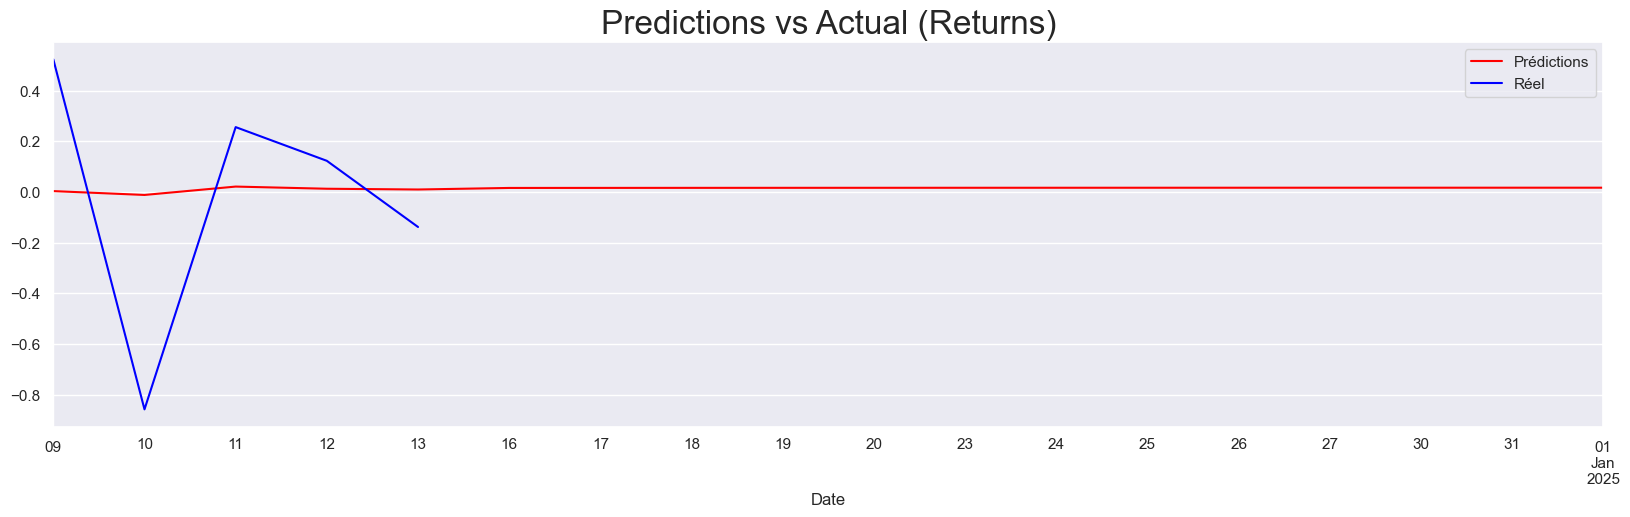

In [140]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Plage de dates
start_date = '2024-12-09'
end_date = '2025-01-01'

# Créer et ajuster le modèle ARIMA pour les rendements 'ret_ftse' de df
model_ret_arma = ARIMA(df_comp['ret_ftse'][1:], order=(1, 0, 1))
results_ret_arma = model_ret_arma.fit()

# Effectuer la prédiction sur la plage de dates spécifiée
df_pred_arma = results_ret_arma.predict(start=start_date, end=end_date)

# Tracer les prédictions (en rouge)
df_pred_arma.plot(figsize=(20, 5), color="red", label="Prédictions")

# Tracer les valeurs réelles de 'ret_ftse' dans df_test (en bleu)
df_test['ret_ftse'][start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre
plt.title("Predictions vs Actual (Returns)", size=24)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()



In [141]:
df_pred_arma.head()

2024-12-09    0.003305
2024-12-10   -0.011879
2024-12-11    0.021186
2024-12-12    0.012622
2024-12-13    0.009635
Freq: B, Name: predicted_mean, dtype: float64

In [142]:
df_pred_arma.tail()

2024-12-26    0.016640
2024-12-27    0.016684
2024-12-30    0.016721
2024-12-31    0.016752
2025-01-01    0.016777
Freq: B, Name: predicted_mean, dtype: float64

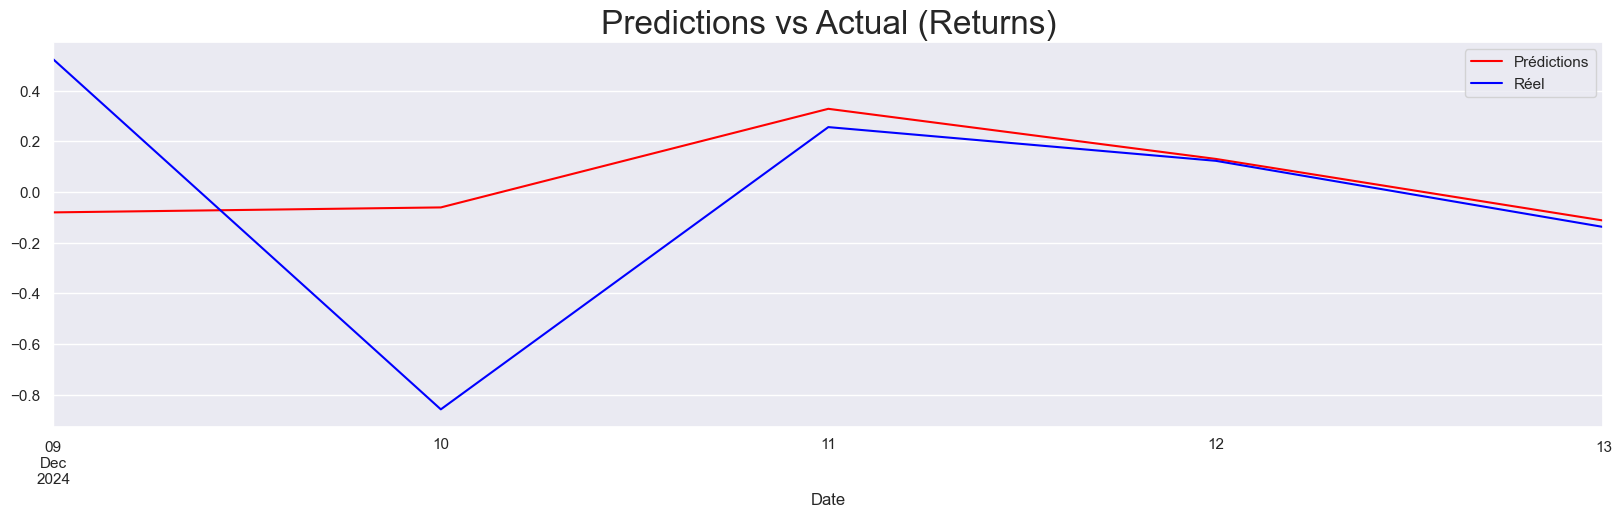

In [148]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

start_date = "2024-12-09"
end_date = "2024-12-13"

# Créer et ajuster le modèle ARIMAX pour les rendements 'ret_ftse' de df avec des variables exogènes
model_ret_armax = ARIMA(df_comp['ret_ftse'][1:], exog=df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], order=(1, 0, 1))
results_ret_armax = model_ret_armax.fit()

# Effectuer la prédiction en utilisant les variables exogènes de df_test pour la période spécifiée
df_pred_armax = results_ret_armax.predict(start=start_date, end=end_date, exog=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']].loc[start_date:end_date])

# Tracer les prédictions (en rouge)
df_pred_armax.plot(figsize=(20, 5), color="red", label="Prédictions")

# Tracer les valeurs réelles de 'ret_ftse' dans df_test (en bleu)
df_test['ret_ftse'].loc[start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre
plt.title("Predictions vs Actual (Returns)", size=24)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


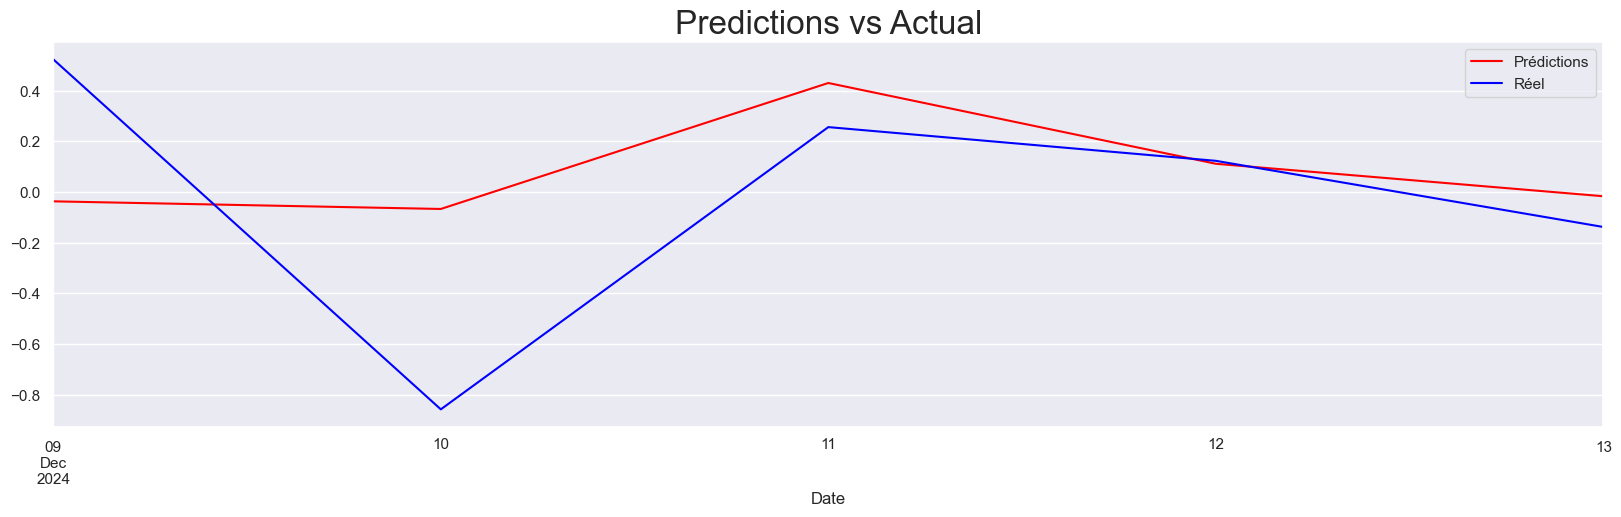

In [154]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Définir les dates de début et de fin
start_date = "2024-12-09"  # Ajustez selon votre plage de données disponible
end_date = "2024-12-13"    # Ajustez selon la plage de dates de df_test

# Créer et ajuster le modèle SARIMAX
model_ret_sarimax = SARIMAX(df_comp.ret_ftse[1:], 
                            exog=df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], 
                            order=(3, 0, 4), 
                            seasonal_order=(3, 0, 2, 12))

# Ajuster le modèle SARIMAX
results_ret_sarimax = model_ret_sarimax.fit()

# Effectuer la prédiction pour la période choisie
df_pred_sarimax = results_ret_sarimax.predict(start=start_date, end=end_date, 
                                              exog=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']].loc[start_date:end_date])

# Tracer les prédictions (en rouge) et les valeurs réelles (en bleu)
df_pred_sarimax[start_date:end_date].plot(figsize=(20, 5), color="red", label="Prédictions")
df_test.ret_ftse[start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre et afficher le graphique
plt.title("Predictions vs Actual", size=24)
plt.legend()
plt.show()



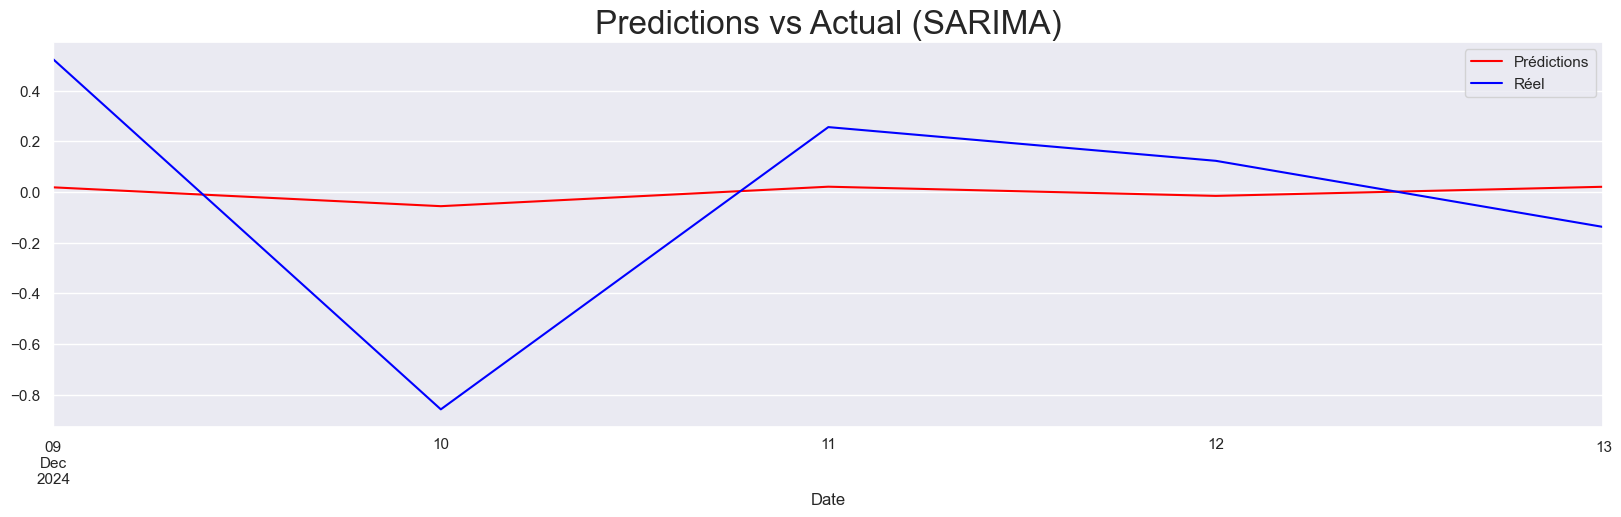

In [155]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


start_date = "2024-12-09"  # Ajustez selon votre plage de données disponible
end_date = "2024-12-13"    # Ajustez selon la plage de dates de df_test

# Créer et ajuster le modèle SARIMA
model_ret_sarma = SARIMAX(df_comp.ret_ftse[1:], order=(3, 0, 4), seasonal_order=(3, 0, 2, 12))
results_ret_sarma = model_ret_sarma.fit()

# Effectuer la prédiction pour la période choisie
df_pred_sarma = results_ret_sarma.predict(start=start_date, end=end_date)

# Tracer les prédictions (en rouge) et les valeurs réelles (en bleu)
df_pred_sarma[start_date:end_date].plot(figsize=(20, 5), color="red", label="Prédictions")
df_test.ret_ftse[start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre et afficher le graphique
plt.title("Predictions vs Actual (SARIMA)", size=24)
plt.legend()
plt.show()

In [160]:
model_auto = auto_arima(df_comp.ret_ftse[1:])

In [168]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods=len(df_test.loc[start_date:end_date])), 
                            index = df_test.loc[start_date:end_date].index)


In [180]:
print(df_auto_pred.loc[start_date:end_date])


             0
Date          
2024-12-10 NaN
2024-12-11 NaN
2024-12-12 NaN
2024-12-13 NaN


In [175]:
print(df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']].head())  # Vérifiez les données d'entrée


Ticker       ret_spx   ret_dax ret_nikkei
Price                                    
Date                                     
1994-01-10       NaN       NaN        NaN
1994-01-11 -0.239860  0.139330   0.226696
1994-01-12  0.008438 -2.066336   1.669606
1994-01-13 -0.358524 -1.818921  -1.152615
1994-01-14  0.516435  0.405156   2.134004


In [182]:
# Imprimer les prédictions pour vérifier leur validité
print(df_auto_pred)


             0
Date          
2024-12-09 NaN
2024-12-10 NaN
2024-12-11 NaN
2024-12-12 NaN
2024-12-13 NaN


In [183]:
# Si vous utilisez SARIMAX ou un autre modèle, assurez-vous d'utiliser la bonne syntaxe pour la prédiction :

df_auto_pred = model_auto.predict(start=start_date, end=end_date)


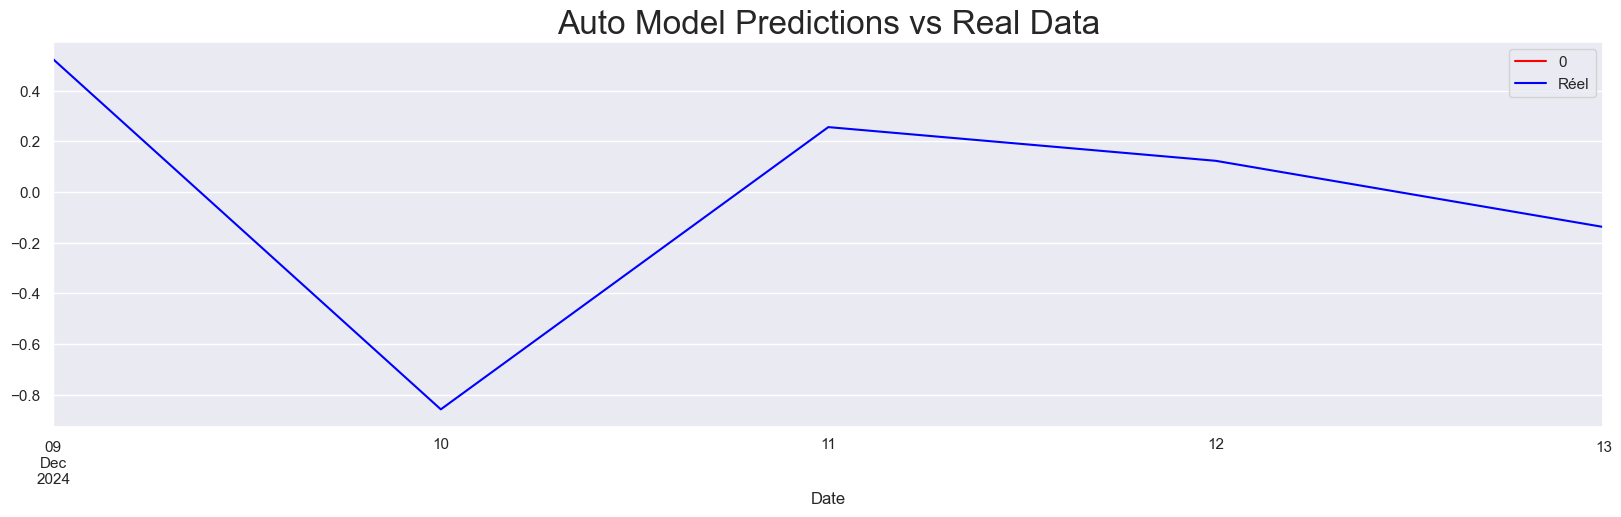

In [184]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = "2024-12-09"
end_date = "2024-12-13"

# Créer et ajuster le modèle AutoARIMA avec les exogènes (les variables externes)
model_auto = auto_arima(df_comp.ret_ftse[1:], exogenous=df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                        m=5, max_p=5, max_q=5, max_P=5, max_Q=5)

# Effectuer la prédiction pour la période choisie
df_auto_pred = pd.DataFrame(
    model_auto.predict(n_periods=len(df_test[start_date:end_date]), 
                       exogenous=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']].loc[start_date:end_date]),
    index=df_test[start_date:end_date].index
)

# Tracer les prédictions (en rouge) et les valeurs réelles (en bleu)
df_auto_pred.plot(figsize=(20, 5), color="red", label="Prédictions")
df_test.ret_ftse[start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre et afficher le graphique
plt.title("Auto Model Predictions vs Real Data", size=24)
plt.legend()
plt.show()


<Figure size 2000x500 with 0 Axes>

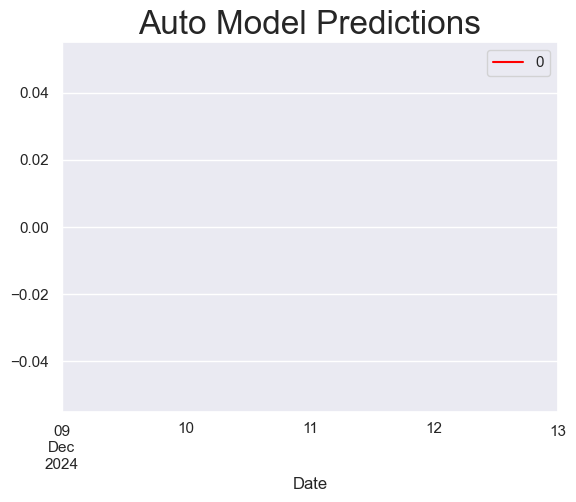

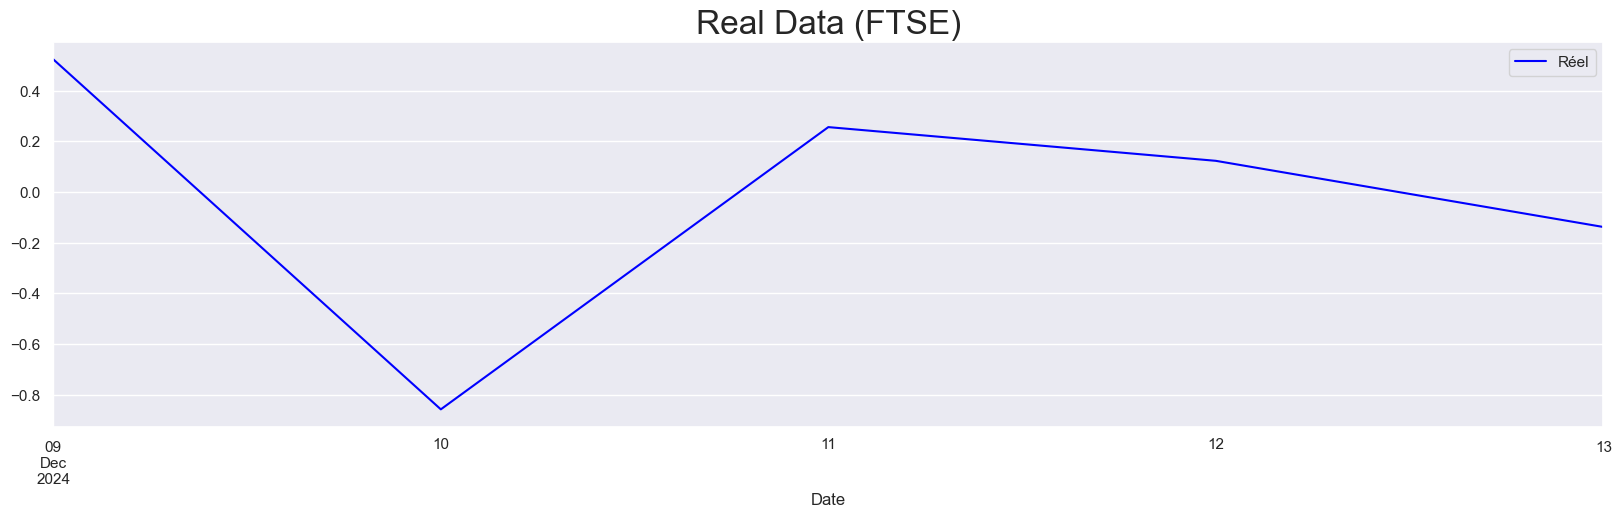

In [185]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = "2024-12-09"
end_date = "2024-12-13"

# Créer et ajuster le modèle AutoARIMA avec les exogènes (les variables externes)
model_auto = auto_arima(df_comp.ret_ftse[1:], exogenous=df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                        m=5, max_p=5, max_q=5, max_P=5, max_Q=5)

# Effectuer la prédiction pour la période choisie
df_auto_pred = pd.DataFrame(
    model_auto.predict(n_periods=len(df_test[start_date:end_date]), 
                       exogenous=df_test[['ret_spx', 'ret_dax', 'ret_nikkei']].loc[start_date:end_date]),
    index=df_test[start_date:end_date].index
)

# Tracer la courbe des prédictions (en rouge)
plt.figure(figsize=(20, 5))
df_auto_pred.plot(color="red", label="Prédictions")
plt.title("Auto Model Predictions", size=24)
plt.legend()
plt.show()

# Tracer la courbe des valeurs réelles (en bleu)
plt.figure(figsize=(20, 5))
df_test.ret_ftse[start_date:end_date].plot(color="blue", label="Réel")
plt.title("Real Data (FTSE)", size=24)
plt.legend()
plt.show()


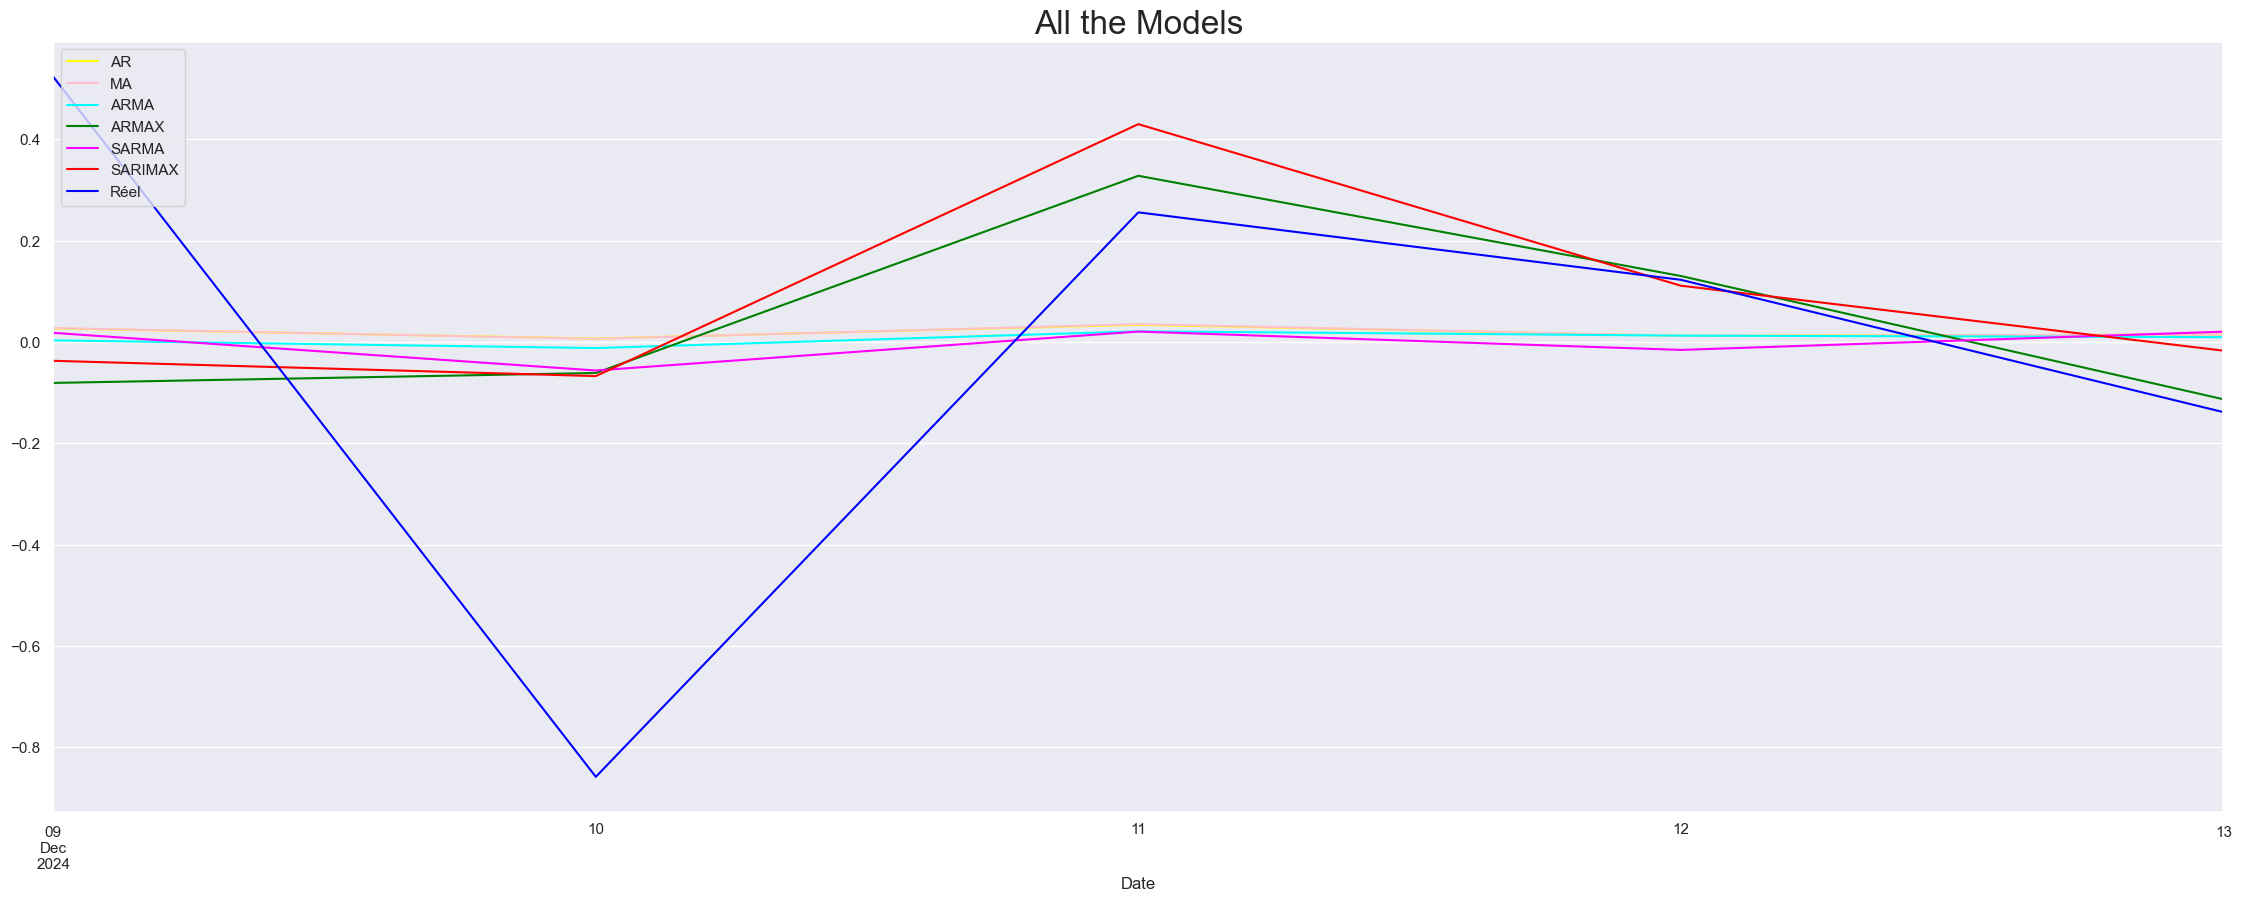

In [187]:
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = "2024-12-09"
end_date = "2024-12-13"
 # Exemple de date de fin

# Tracer les prédictions des différents modèles
plt.figure(figsize=(28, 10))

df_pred_ar[start_date:end_date].plot(color="yellow", label="AR")
df_pred_ma[start_date:end_date].plot(color="pink", label="MA")
df_pred_arma[start_date:end_date].plot(color="cyan", label="ARMA")
df_pred_armax[start_date:end_date].plot(color="green", label="ARMAX")
df_pred_sarma[start_date:end_date].plot(color="magenta", label="SARMA")
df_pred_sarimax[start_date:end_date].plot(color="red", label="SARIMAX")

# Tracer les données réelles (blue)
df_test.ret_ftse[start_date:end_date].plot(color="blue", label="Réel")

# Ajouter une légende et un titre
plt.legend(loc='upper left')
plt.title("All the Models", size=24)

# Afficher le graphique
plt.show()


In [188]:
mod_garch = arch_model(df_comp.ret_ftse[1:], vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
res_garch = mod_garch.fit(last_obs=start_date, update_freq=5)

Iteration:      5,   Func. Count:     37,   Neg. LLF: 10705.569177617763
Iteration:     10,   Func. Count:     65,   Neg. LLF: 10665.405693390754
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10665.405692740587
            Iterations: 11
            Function evaluations: 70
            Gradient evaluations: 11


In [189]:
pred_garch = res_garch.forecast(horizon=1, align='target')

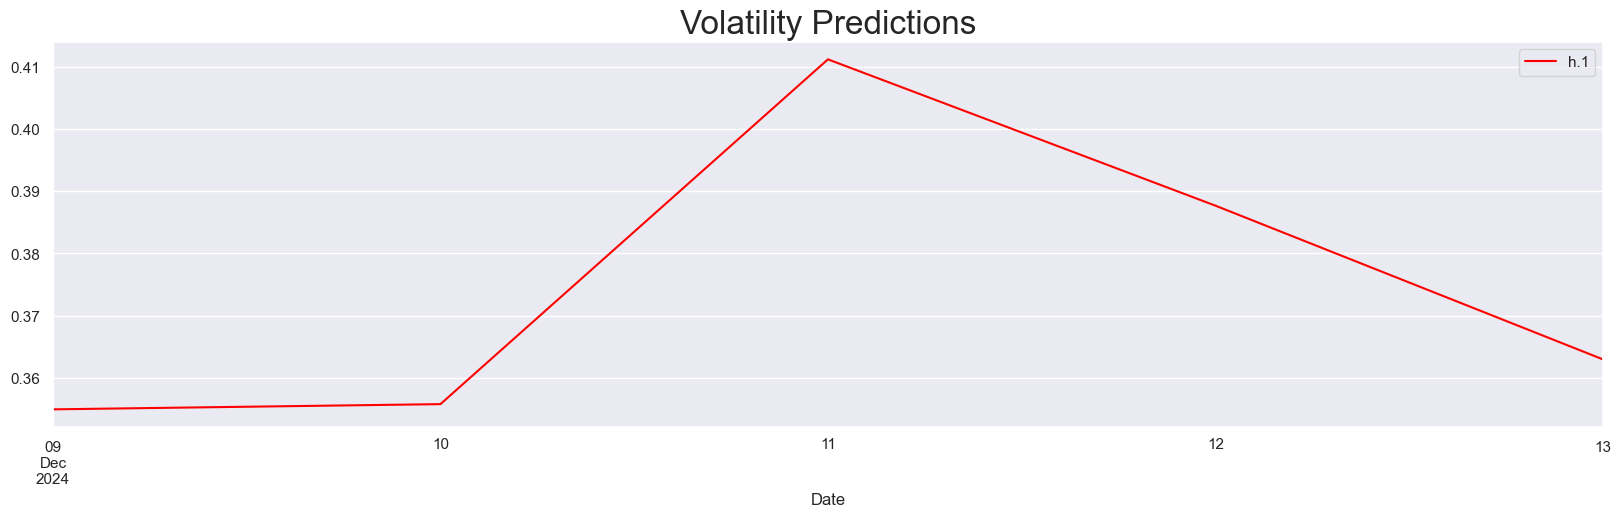

In [190]:
pred_garch.residual_variance[start_date:end_date].plot(figsize=(20, 5), color="red")
plt.title("Volatility Predictions", size=24)
plt.show()

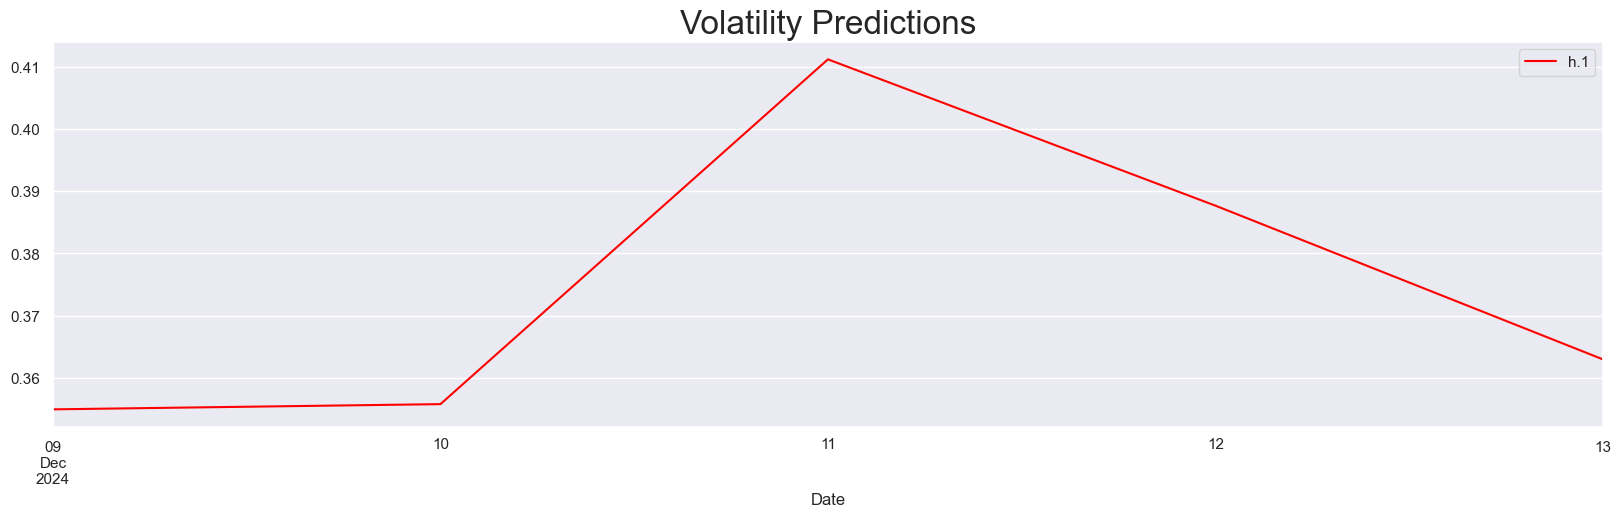

In [191]:
pred_garch.residual_variance[start_date:].plot(figsize=(20, 5), color="red")
plt.title("Volatility Predictions", size=24)
plt.show()

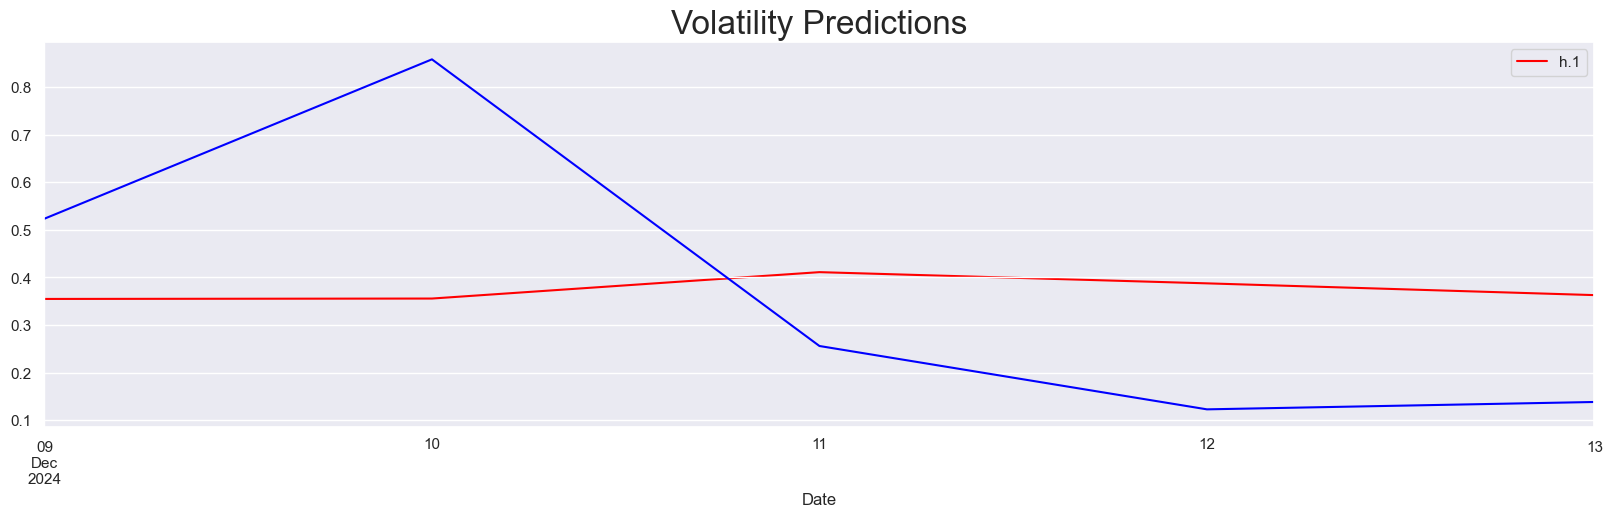

In [192]:
pred_garch.residual_variance[start_date:].plot(figsize=(20, 5), color="red", zorder=-2)
df_test.ret_ftse.abs().plot(color="blue", zorder=1)
plt.title("Volatility Predictions", size=24)
plt.show()

In [193]:
pred_garch = res_garch.forecast(horizon=100, align='target')
pred_garch.residual_variance[1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-09,0.354909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-10,0.355748,0.367264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-11,0.411224,0.368089,0.379409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-12,0.387682,0.422625,0.380220,0.391349,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-13,0.362951,0.399482,0.433833,0.392146,0.403086,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
from statsmodels.tsa.api import VAR

# Sélectionner les retours des indices pour l'analyse
df_ret = df_comp[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

# Créer le modèle VAR
model_var = VAR(df_ret)

# Sélectionner l'ordre optimal du modèle en fonction de l'AIC
lag_order = model_var.select_order(maxlags=20).aic

# Ajuster le modèle VAR avec l'ordre sélectionné
results_var = model_var.fit(lag_order, ic='aic')

# Afficher les résultats du modèle
print(results_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Dec, 2024
Time:                     16:38:48
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                -0.00261231
Nobs:                     8060.00    HQIC:                -0.0871046
Log likelihood:          -45070.4    FPE:                   0.877174
AIC:                    -0.131050    Det(Omega_mle):        0.861250
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.045889         0.012841            3.574           0.000
L1.ret_spx           -0.120598         0.014206           -8.489           0.000
L1.ret_dax            0.064625         0.016077           

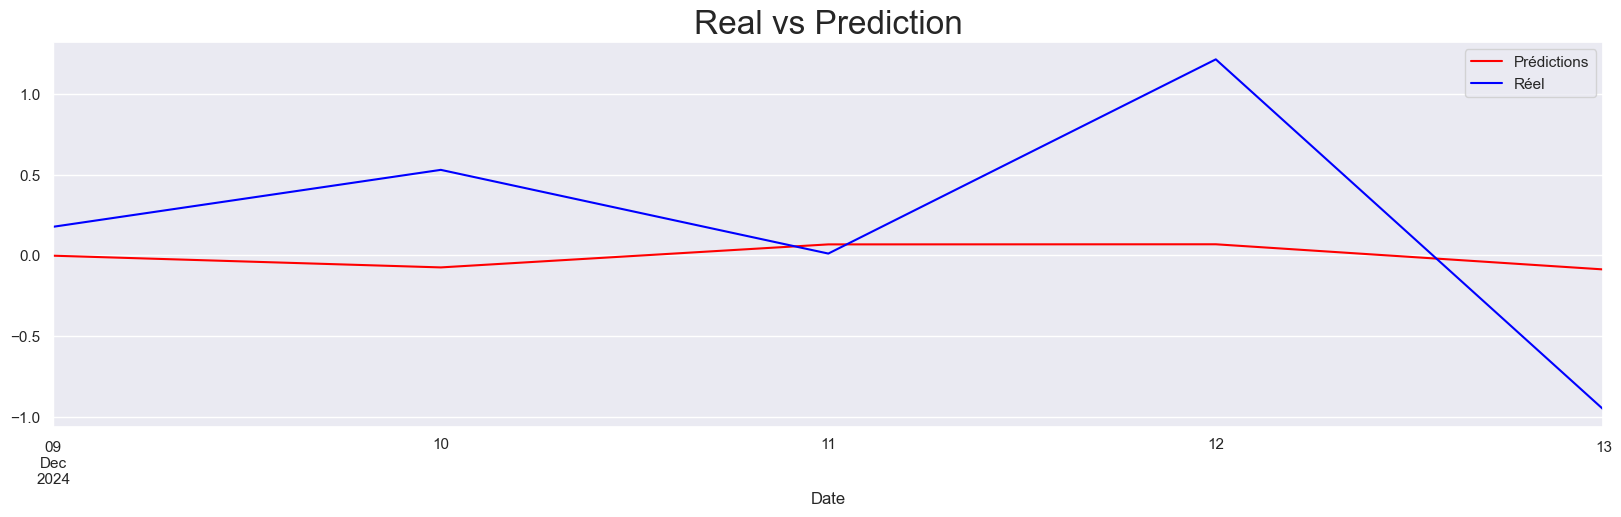

In [205]:
## Nombre de retards (lags) du modèle VAR
lag_order_ret = results_var.k_ar

# Faire la prédiction avec le modèle VAR
var_pred_ret = results_var.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

# Convertir les prédictions en un DataFrame
# Assurez-vous que le nombre de colonnes correspond au nombre de séries dans df_ret
df_ret_pred = pd.DataFrame(data=var_pred_ret, 
                           index=df_test[start_date:end_date].index, 
                           columns=df_ret.columns)  # Utilisation des colonnes de df_ret

# Tracer les prédictions et les valeurs réelles
df_ret_pred['ret_nikkei'][start_date:end_date].plot(figsize=(20, 5), color="red", label="Prédictions")
df_test['ret_nikkei'][start_date:end_date].plot(color="blue", label="Réel")

# Ajouter un titre et afficher la légende
plt.title("Real vs Prediction", size=24)
plt.legend()
plt.show()



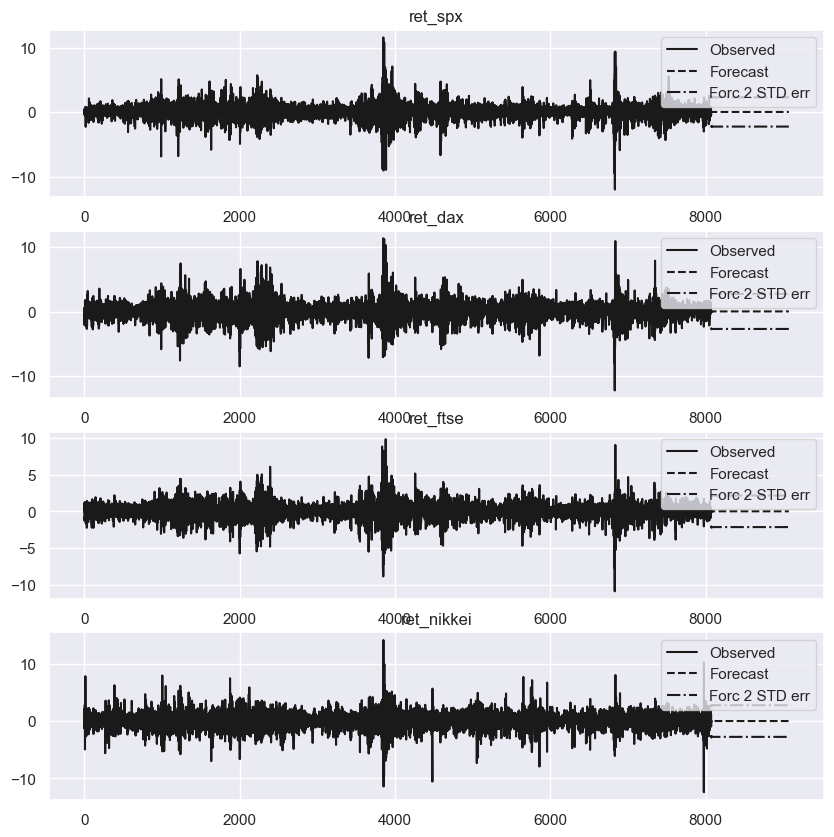

In [208]:
# Importation des bibliothèques nécessaires
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Assure-toi d'utiliser un DataFrame df_ret correctement défini
df_ret = df_comp[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

# Ajuste le modèle VAR
model_var = VAR(df_ret)
results_var_ret = model_var.fit(maxlags=20, ic='aic')  # Ajuste le modèle VAR avec le critère AIC

# Tracer les prévisions pour les 1000 prochaines périodes
results_var_ret.plot_forecast(1000)
plt.show()

